In [2]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_meta = pd.read_csv('C:\\Users\\user\\Desktop\\Fichiers\\S3\\PI\\CNN\\archive\\csv\\meta.csv')
df_meta.head()

,SeriesInstanceUID,StudyInstanceUID,Modality,SeriesDescription,BodyPartExamined,SeriesNumber,Collection,Visibility,ImageCount
0,1.3.6.1.4.1.9590.100.1.2.117041576511324414842...,1.3.6.1.4.1.9590.100.1.2.229361142710768138411...,MG,ROI mask images,BREAST,1,CBIS-DDSM,1,2
1,1.3.6.1.4.1.9590.100.1.2.438738396107617880132...,1.3.6.1.4.1.9590.100.1.2.195593486612988388325...,MG,ROI mask images,BREAST,1,CBIS-DDSM,1,2
2,1.3.6.1.4.1.9590.100.1.2.767416741131676463382...,1.3.6.1.4.1.9590.100.1.2.257901172612530623323...,MG,ROI mask images,BREAST,1,CBIS-DDSM,1,2
3,1.3.6.1.4.1.9590.100.1.2.296931352612305599800...,1.3.6.1.4.1.9590.100.1.2.109468616710242115222...,MG,ROI mask images,BREAST,1,CBIS-DDSM,1,2
4,1.3.6.1.4.1.9590.100.1.2.436657670120353100077...,1.3.6.1.4.1.9590.100.1.2.380627129513562450304...,MG,ROI mask images,BREAST,1,CBIS-DDSM,1,2


In [4]:
df_dicom = pd.read_csv('C:\\Users\\user\\Desktop\\Fichiers\\S3\\PI\\CNN\\archive\\csv\\dicom_info.csv')
df_dicom.head()

,file_path,image_path,AccessionNumber,BitsAllocated,BitsStored,BodyPartExamined,Columns,ContentDate,ContentTime,ConversionType,...,SecondaryCaptureDeviceManufacturerModelName,SeriesDescription,SeriesInstanceUID,SeriesNumber,SmallestImagePixelValue,SpecificCharacterSet,StudyDate,StudyID,StudyInstanceUID,StudyTime
0,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.12930...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...,NaN,16,16,BREAST,351,20160426,131732.685,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.129308726812851964007...,1,23078,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.271867287611061855725...,214951.0
1,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.24838...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...,NaN,16,16,BREAST,3526,20160426,143829.101,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.248386742010678582309...,1,0,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.161516517311681906612...,193426.0
2,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.26721...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...,NaN,16,16,BREAST,1546,20160503,111956.298,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.267213171011171858918...,1,0,ISO_IR 100,20160807.0,DDSM,1.3.6.1.4.1.9590.100.1.2.291043622711253836701...,161814.0
3,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,NaN,16,16,BREAST,97,20160503,115347.770,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,32298,ISO_IR 100,20170829.0,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,180109.0
4,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,NaN,8,8,Left Breast,3104,20160503,115347.770,WSD,...,MATLAB,NaN,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,0,ISO_IR 100,NaN,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,NaN


In [5]:
df_dicom.SeriesDescription.unique()

array(['cropped images', 'full mammogram images', nan, 'ROI mask images'],
      dtype=object)

In [6]:
cropped_images = df_dicom[df_dicom.SeriesDescription=='cropped images'].image_path
cropped_images.head()

0     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...
3     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...
6     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.153339...
7     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.178994...
10    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.411833...
Name: image_path, dtype: object

In [7]:
#full mammogram images
full_mammo = df_dicom[df_dicom.SeriesDescription=='full mammogram images'].image_path

In [8]:
# ROI images
roi_img = df_dicom[df_dicom.SeriesDescription=='ROI mask images'].image_path

In [9]:
# set correct image path for image types
imdir = 'C:/Users/user/Desktop/Fichiers/S3/PI/CNN/archive/jpeg'

In [10]:
# change directory path of images

cropped_images = cropped_images.apply(lambda x: x.replace('CBIS-DDSM/jpeg', imdir))
full_mammo = full_mammo.apply(lambda x: x.replace('CBIS-DDSM/jpeg', imdir))
roi_img = roi_img.apply(lambda x: x.replace('CBIS-DDSM/jpeg', imdir))


# view new paths
print('Cropped Images paths:\n')
print(cropped_images.iloc[0])
print('Full mammo Images paths:\n')
print(full_mammo.iloc[0])
print('ROI Mask Images paths:\n')
print(roi_img.iloc[0])

Cropped Images paths:

C:/Users/user/Desktop/Fichiers/S3/PI/CNN/archive/jpeg/1.3.6.1.4.1.9590.100.1.2.129308726812851964007517874181459556304/1-172.jpg
Full mammo Images paths:

C:/Users/user/Desktop/Fichiers/S3/PI/CNN/archive/jpeg/1.3.6.1.4.1.9590.100.1.2.248386742010678582309005372213277814849/1-249.jpg
ROI Mask Images paths:

C:/Users/user/Desktop/Fichiers/S3/PI/CNN/archive/jpeg/1.3.6.1.4.1.9590.100.1.2.153339052913121382622526066491844156138/2-270.jpg


In [11]:
# organize image paths
full_mammo_dict = dict()
cropped_images_dict = dict()
roi_img_dict = dict()

for dicom in full_mammo:
    key = dicom.split("/")[10]
    full_mammo_dict[key] = dicom
    
for dicom in cropped_images:
    key = dicom.split("/")[10]
    cropped_images_dict[key] = dicom

for dicom in roi_img:
    key = dicom.split("/")[10]
    roi_img[key] = dicom

# view keys
next(iter((full_mammo_dict.items())))

('1.3.6.1.4.1.9590.100.1.2.248386742010678582309005372213277814849',
 'C:/Users/user/Desktop/Fichiers/S3/PI/CNN/archive/jpeg/1.3.6.1.4.1.9590.100.1.2.248386742010678582309005372213277814849/1-249.jpg')

MASS Data

In [12]:
# load the mass dataset
mass_train = pd.read_csv('C:\\Users\\user\\Desktop\\Fichiers\\S3\\PI\\CNN\\archive\\csv\\mass_case_description_train_set.csv')
mass_test = pd.read_csv('C:\\Users\\user\\Desktop\\Fichiers\\S3\\PI\\CNN\\archive\\csv\\mass_case_description_test_set.csv')

mass_train.head()

unique_values = mass_train['assessment'].unique()
print("Unique values in 'assessment':", unique_values)

Unique values in 'assessment': [4 3 5 2 0 1]


In [13]:
# fix image paths
def fix_image_path(data):
    """correct dicom paths to correct image paths"""
    for index, img in enumerate(data.values):
        img_name = img[11].split("/")[2]
        data.iloc[index,11] = full_mammo_dict[img_name]
        img_name = img[12].split("/")[2]
        data.iloc[index,12] = cropped_images_dict[img_name]
        
# apply to datasets
fix_image_path(mass_train)
fix_image_path(mass_test)

In [14]:
# check unique values in pathology column
mass_train.pathology.unique()

array(['MALIGNANT', 'BENIGN', 'BENIGN_WITHOUT_CALLBACK'], dtype=object)

In [15]:
mass_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1318 entries, 0 to 1317
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   patient_id               1318 non-null   object
 1   breast_density           1318 non-null   int64 
 2   left or right breast     1318 non-null   object
 3   image view               1318 non-null   object
 4   abnormality id           1318 non-null   int64 
 5   abnormality type         1318 non-null   object
 6   mass shape               1314 non-null   object
 7   mass margins             1275 non-null   object
 8   assessment               1318 non-null   int64 
 9   pathology                1318 non-null   object
 10  subtlety                 1318 non-null   int64 
 11  image file path          1318 non-null   object
 12  cropped image file path  1318 non-null   object
 13  ROI mask file path       1318 non-null   object
dtypes: int64(4), object(10)
memory usage: 14

In [16]:
# rename columns
mass_train = mass_train.rename(columns={'left or right breast': 'left_or_right_breast',
                                           'image view': 'image_view',
                                           'abnormality id': 'abnormality_id',
                                           'abnormality type': 'abnormality_type',
                                           'mass shape': 'mass_shape',
                                           'mass margins': 'mass_margins',
                                           'image file path': 'image_file_path',
                                           'cropped image file path': 'cropped_image_file_path',
                                           'ROI mask file path': 'ROI_mask_file_path'})

mass_train.head(5)

,patient_id,breast_density,left_or_right_breast,image_view,abnormality_id,abnormality_type,mass_shape,mass_margins,assessment,pathology,subtlety,image_file_path,cropped_image_file_path,ROI_mask_file_path
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,C:/Users/user/Desktop/Fichiers/S3/PI/CNN/archi...,C:/Users/user/Desktop/Fichiers/S3/PI/CNN/archi...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...
1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,C:/Users/user/Desktop/Fichiers/S3/PI/CNN/archi...,C:/Users/user/Desktop/Fichiers/S3/PI/CNN/archi...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...
2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,C:/Users/user/Desktop/Fichiers/S3/PI/CNN/archi...,C:/Users/user/Desktop/Fichiers/S3/PI/CNN/archi...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...
3,P_00004,3,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,C:/Users/user/Desktop/Fichiers/S3/PI/CNN/archi...,C:/Users/user/Desktop/Fichiers/S3/PI/CNN/archi...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...
4,P_00004,3,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,C:/Users/user/Desktop/Fichiers/S3/PI/CNN/archi...,C:/Users/user/Desktop/Fichiers/S3/PI/CNN/archi...,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....


In [17]:
# check for null values
mass_train.isnull().sum()

patient_id                  0
breast_density              0
left_or_right_breast        0
image_view                  0
abnormality_id              0
abnormality_type            0
mass_shape                  4
mass_margins               43
assessment                  0
pathology                   0
subtlety                    0
image_file_path             0
cropped_image_file_path     0
ROI_mask_file_path          0
dtype: int64

In [18]:
# fill in missing values using the backwards fill method
mass_train['mass_shape'] = mass_train['mass_shape'].bfill()
mass_train['mass_margins'] = mass_train['mass_margins'].bfill()

#check null values
mass_train.isnull().sum()

patient_id                 0
breast_density             0
left_or_right_breast       0
image_view                 0
abnormality_id             0
abnormality_type           0
mass_shape                 0
mass_margins               0
assessment                 0
pathology                  0
subtlety                   0
image_file_path            0
cropped_image_file_path    0
ROI_mask_file_path         0
dtype: int64

In [19]:
# quantitative summary of features
mass_train.describe()

,breast_density,abnormality_id,assessment,subtlety
count,1318.000000,1318.000000,1318.000000,1318.000000
mean,2.203338,1.116085,3.504552,3.965857
std,0.873774,0.467013,1.414609,1.102032
min,1.000000,1.000000,0.000000,0.000000
25%,2.000000,1.000000,3.000000,3.000000
50%,2.000000,1.000000,4.000000,4.000000
75%,3.000000,1.000000,4.000000,5.000000
max,4.000000,6.000000,5.000000,5.000000


In [20]:
# view mass_test
mass_test.head()

,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00016,4,LEFT,CC,1,mass,IRREGULAR,SPICULATED,5,MALIGNANT,5,C:/Users/user/Desktop/Fichiers/S3/PI/CNN/archi...,C:/Users/user/Desktop/Fichiers/S3/PI/CNN/archi...,Mass-Test_P_00016_LEFT_CC_1/1.3.6.1.4.1.9590.1...
1,P_00016,4,LEFT,MLO,1,mass,IRREGULAR,SPICULATED,5,MALIGNANT,5,C:/Users/user/Desktop/Fichiers/S3/PI/CNN/archi...,C:/Users/user/Desktop/Fichiers/S3/PI/CNN/archi...,Mass-Test_P_00016_LEFT_MLO_1/1.3.6.1.4.1.9590....
2,P_00017,2,LEFT,CC,1,mass,ROUND,CIRCUMSCRIBED,4,MALIGNANT,4,C:/Users/user/Desktop/Fichiers/S3/PI/CNN/archi...,C:/Users/user/Desktop/Fichiers/S3/PI/CNN/archi...,Mass-Test_P_00017_LEFT_CC_1/1.3.6.1.4.1.9590.1...
3,P_00017,2,LEFT,MLO,1,mass,ROUND,ILL_DEFINED,4,MALIGNANT,4,C:/Users/user/Desktop/Fichiers/S3/PI/CNN/archi...,C:/Users/user/Desktop/Fichiers/S3/PI/CNN/archi...,Mass-Test_P_00017_LEFT_MLO_1/1.3.6.1.4.1.9590....
4,P_00032,3,RIGHT,CC,1,mass,ROUND,OBSCURED,0,BENIGN,2,C:/Users/user/Desktop/Fichiers/S3/PI/CNN/archi...,C:/Users/user/Desktop/Fichiers/S3/PI/CNN/archi...,Mass-Test_P_00032_RIGHT_CC_1/1.3.6.1.4.1.9590....


In [21]:
# check datasets shape
print(f'Shape of mass_train: {mass_train.shape}')
print(f'Shape of mass_test: {mass_test.shape}')

Shape of mass_train: (1318, 14)
Shape of mass_test: (378, 14)


In [22]:
mass_test.isnull().sum()

patient_id                  0
breast_density              0
left or right breast        0
image view                  0
abnormality id              0
abnormality type            0
mass shape                  0
mass margins               17
assessment                  0
pathology                   0
subtlety                    0
image file path             0
cropped image file path     0
ROI mask file path          0
dtype: int64

In [23]:
mass_test = mass_test.rename(columns={'left or right breast': 'left_or_right_breast',
                                           'image view': 'image_view',
                                           'abnormality id': 'abnormality_id',
                                           'abnormality type': 'abnormality_type',
                                           'mass shape': 'mass_shape',
                                           'mass margins': 'mass_margins',
                                           'image file path': 'image_file_path',
                                           'cropped image file path': 'cropped_image_file_path',
                                           'ROI mask file path': 'ROI_mask_file_path'})

In [24]:
# fill in missing values using the backwards fill method
mass_test['mass_margins'] = mass_test['mass_margins'].bfill()

#check null values
mass_test.isnull().sum()

patient_id                 0
breast_density             0
left_or_right_breast       0
image_view                 0
abnormality_id             0
abnormality_type           0
mass_shape                 0
mass_margins               0
assessment                 0
pathology                  0
subtlety                   0
image_file_path            0
cropped_image_file_path    0
ROI_mask_file_path         0
dtype: int64

Data Visualization

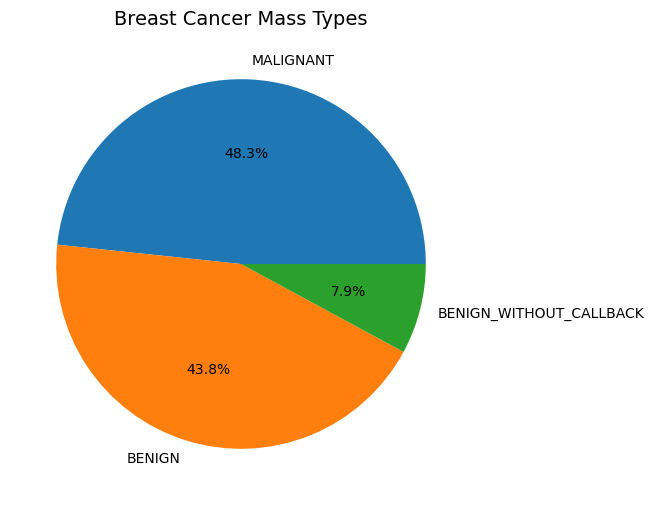

In [25]:
# pathology distributions
value = mass_train['pathology'].value_counts()
plt.figure(figsize=(8,6))

plt.pie(value, labels=value.index, autopct='%1.1f%%')
plt.title('Breast Cancer Mass Types', fontsize=14)
plt.show()

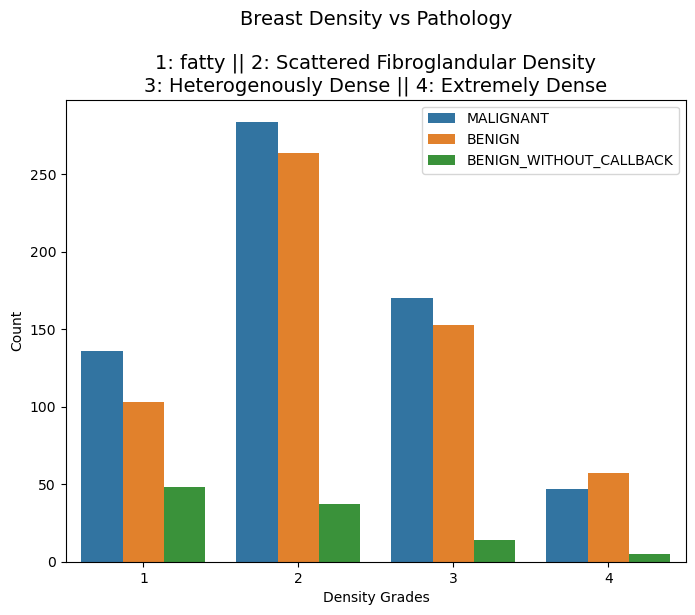

In [26]:
# breast density against pathology
plt.figure(figsize=(8,6))

sns.countplot(mass_train, x='breast_density', hue='pathology')
plt.title('Breast Density vs Pathology\n\n1: fatty || 2: Scattered Fibroglandular Density\n3: Heterogenously Dense || 4: Extremely Dense',
          fontsize=14)
plt.xlabel('Density Grades')
plt.ylabel('Count')
plt.legend()
plt.show()

Full Mammograms:



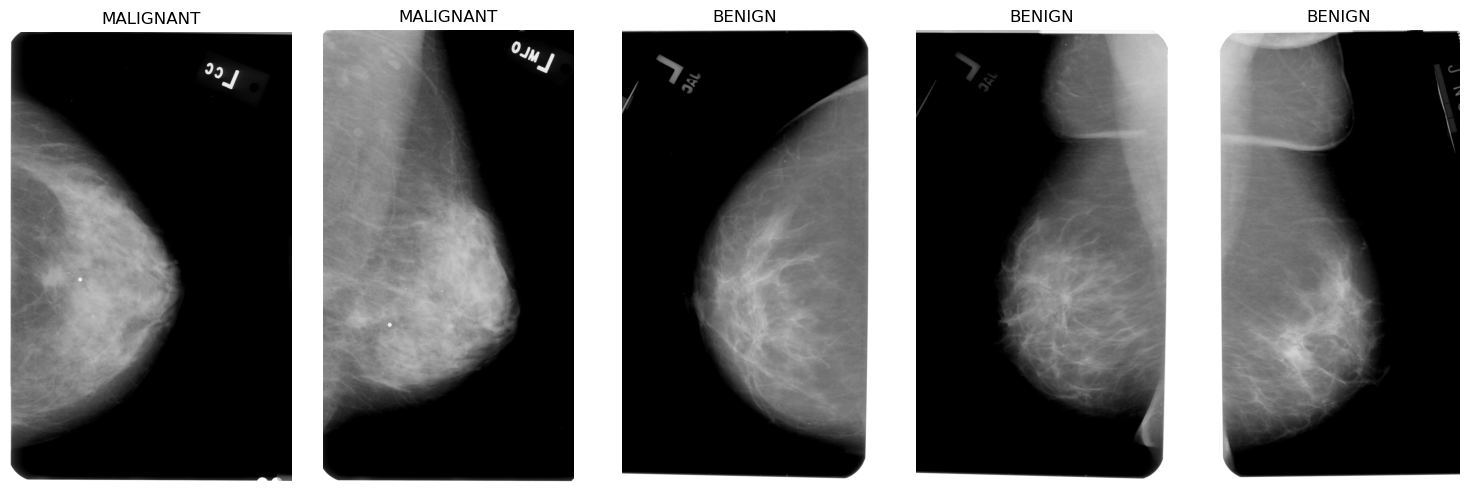

Cropped Mammograms:



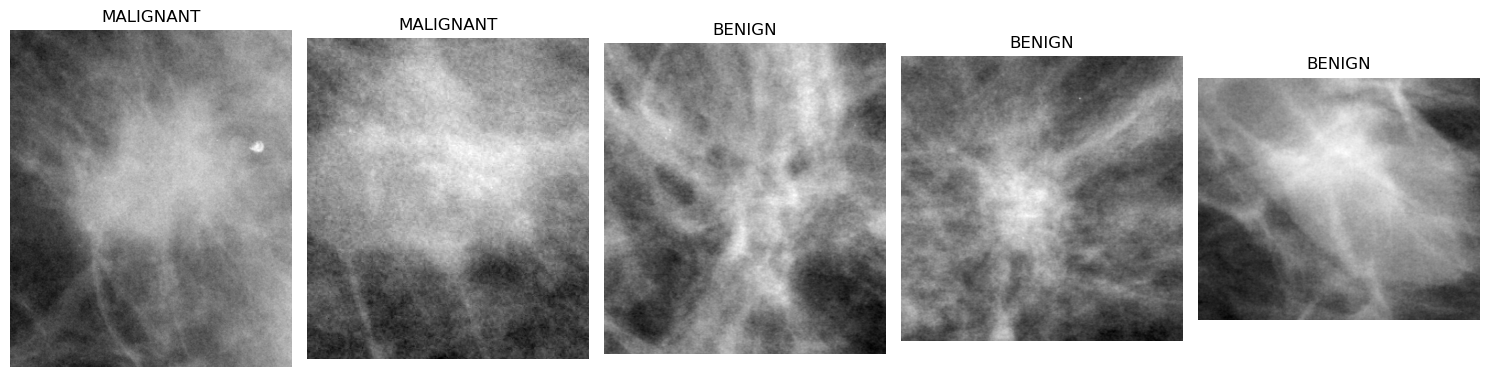

In [27]:
# Display some images
import matplotlib.image as mpimg

# create function to display images
def display_images(column, number):
    # create figure and axes
    number_to_visualize = number
    rows = 1
    cols = number_to_visualize
    fig, axes = plt.subplots(rows, cols, figsize=(15, 5))
    
    # Loop through rows and display images
    for index, row in mass_train.head(number_to_visualize).iterrows():
        image_path = row[column]
        image = mpimg.imread(image_path)
        ax = axes[index]
        ax.imshow(image, cmap='gray')
        ax.set_title(f"{row['pathology']}")
        ax.axis('off')
    plt.tight_layout()
    plt.show()

print('Full Mammograms:\n')
display_images('image_file_path', 5)
print('Cropped Mammograms:\n')
display_images('cropped_image_file_path', 5)

CALCIFICATIONS Data

In [28]:
# load the mass dataset
calc_train = pd.read_csv('C:\\Users\\user\\Desktop\\Fichiers\\S3\\PI\\CNN\\archive\\csv\\calc_case_description_train_set.csv')
calc_test = pd.read_csv('C:\\Users\\user\\Desktop\\Fichiers\\S3\\PI\\CNN\\archive\\csv\\calc_case_description_test_set.csv')

calc_train.head()

,patient_id,breast density,left or right breast,image view,abnormality id,abnormality type,calc type,calc distribution,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00005,3,RIGHT,CC,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,Calc-Training_P_00005_RIGHT_CC/1.3.6.1.4.1.959...,Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...,Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...
1,P_00005,3,RIGHT,MLO,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,Calc-Training_P_00005_RIGHT_MLO/1.3.6.1.4.1.95...,Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....,Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....
2,P_00007,4,LEFT,CC,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,Calc-Training_P_00007_LEFT_CC/1.3.6.1.4.1.9590...,Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...,Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...
3,P_00007,4,LEFT,MLO,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,Calc-Training_P_00007_LEFT_MLO/1.3.6.1.4.1.959...,Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...,Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...
4,P_00008,1,LEFT,CC,1,calcification,NaN,REGIONAL,2,BENIGN_WITHOUT_CALLBACK,3,Calc-Training_P_00008_LEFT_CC/1.3.6.1.4.1.9590...,Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...,Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...


In [29]:
print(calc_train["cropped image file path"])

0       Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...
1       Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....
2       Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...
3       Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...
4       Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...
                              ...                        
1541    Calc-Training_P_02566_RIGHT_MLO_1/1.3.6.1.4.1....
1542    Calc-Training_P_02572_LEFT_CC_1/1.3.6.1.4.1.95...
1543    Calc-Training_P_02572_LEFT_MLO_1/1.3.6.1.4.1.9...
1544    Calc-Training_P_02584_LEFT_CC_1/1.3.6.1.4.1.95...
1545    Calc-Training_P_02584_LEFT_MLO_1/1.3.6.1.4.1.9...
Name: cropped image file path, Length: 1546, dtype: object


In [30]:
def fix_image_path2(data):
    m = []
    c = []
    """correct dicom paths to correct image paths"""
    for index, img in enumerate(data.values):
        img_name = img[11].split("/")[2]
        if img_name in full_mammo_dict:
            data.iloc[index,11] = full_mammo_dict[img_name]
        else:
            m.append(index)
            
        img_name = img[12].split("/")[2]
        if img_name in cropped_images_dict:
            data.iloc[index,12] = cropped_images_dict[img_name]
        else :
            c.append(index)
    print(m, c)
        
# apply to datasets

fix_image_path2(calc_train)

[] [344, 1216]


In [31]:
calc_train = calc_train.drop([344, 1216])

In [32]:
#cropped_images_dict['1.3.6.1.4.1.9590.100.1.2.27611247910023474515584644283556391565']

In [33]:
calc_train.pathology.unique()

array(['MALIGNANT', 'BENIGN', 'BENIGN_WITHOUT_CALLBACK'], dtype=object)

In [34]:
calc_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1544 entries, 0 to 1545
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   patient_id               1544 non-null   object
 1   breast density           1544 non-null   int64 
 2   left or right breast     1544 non-null   object
 3   image view               1544 non-null   object
 4   abnormality id           1544 non-null   int64 
 5   abnormality type         1544 non-null   object
 6   calc type                1524 non-null   object
 7   calc distribution        1169 non-null   object
 8   assessment               1544 non-null   int64 
 9   pathology                1544 non-null   object
 10  subtlety                 1544 non-null   int64 
 11  image file path          1544 non-null   object
 12  cropped image file path  1544 non-null   object
 13  ROI mask file path       1544 non-null   object
dtypes: int64(4), object(10)
memory usage: 180.9+ 

In [35]:
# rename columns
calc_train = calc_train.rename(columns={'left or right breast': 'left_or_right_breast',
                                        'breast density': 'breast_density',
                                           'image view': 'image_view',
                                           'abnormality id': 'abnormality_id',
                                           'abnormality type': 'abnormality_type',
                                           'calc type': 'calc_type',
                                           'calc distribution': 'calc_distribution',
                                           'image file path': 'image_file_path',
                                           'cropped image file path': 'cropped_image_file_path',
                                           'ROI mask file path': 'ROI_mask_file_path'})

calc_train.head(5)

,patient_id,breast_density,left_or_right_breast,image_view,abnormality_id,abnormality_type,calc_type,calc_distribution,assessment,pathology,subtlety,image_file_path,cropped_image_file_path,ROI_mask_file_path
0,P_00005,3,RIGHT,CC,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,C:/Users/user/Desktop/Fichiers/S3/PI/CNN/archi...,C:/Users/user/Desktop/Fichiers/S3/PI/CNN/archi...,Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...
1,P_00005,3,RIGHT,MLO,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,C:/Users/user/Desktop/Fichiers/S3/PI/CNN/archi...,C:/Users/user/Desktop/Fichiers/S3/PI/CNN/archi...,Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....
2,P_00007,4,LEFT,CC,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,C:/Users/user/Desktop/Fichiers/S3/PI/CNN/archi...,C:/Users/user/Desktop/Fichiers/S3/PI/CNN/archi...,Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...
3,P_00007,4,LEFT,MLO,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,C:/Users/user/Desktop/Fichiers/S3/PI/CNN/archi...,C:/Users/user/Desktop/Fichiers/S3/PI/CNN/archi...,Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...
4,P_00008,1,LEFT,CC,1,calcification,NaN,REGIONAL,2,BENIGN_WITHOUT_CALLBACK,3,C:/Users/user/Desktop/Fichiers/S3/PI/CNN/archi...,C:/Users/user/Desktop/Fichiers/S3/PI/CNN/archi...,Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...


In [36]:
# check for null values
calc_train.isnull().sum()

patient_id                   0
breast_density               0
left_or_right_breast         0
image_view                   0
abnormality_id               0
abnormality_type             0
calc_type                   20
calc_distribution          375
assessment                   0
pathology                    0
subtlety                     0
image_file_path              0
cropped_image_file_path      0
ROI_mask_file_path           0
dtype: int64

In [37]:
# quantitative summary of features
calc_train.describe()

,breast_density,abnormality_id,assessment,subtlety
count,1544.000000,1544.000000,1544.00000,1544.000000
mean,2.662565,1.415155,3.25842,3.410622
std,0.937169,0.903972,1.22881,1.179778
min,1.000000,1.000000,0.00000,1.000000
25%,2.000000,1.000000,2.00000,3.000000
50%,3.000000,1.000000,4.00000,3.000000
75%,3.000000,1.000000,4.00000,4.000000
max,4.000000,7.000000,5.00000,5.000000


In [38]:
# view mass_test
calc_test.head()

,patient_id,breast density,left or right breast,image view,abnormality id,abnormality type,calc type,calc distribution,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00038,2,LEFT,CC,1,calcification,PUNCTATE-PLEOMORPHIC,CLUSTERED,4,BENIGN,2,Calc-Test_P_00038_LEFT_CC/1.3.6.1.4.1.9590.100...,Calc-Test_P_00038_LEFT_CC_1/1.3.6.1.4.1.9590.1...,Calc-Test_P_00038_LEFT_CC_1/1.3.6.1.4.1.9590.1...
1,P_00038,2,LEFT,MLO,1,calcification,PUNCTATE-PLEOMORPHIC,CLUSTERED,4,BENIGN,2,Calc-Test_P_00038_LEFT_MLO/1.3.6.1.4.1.9590.10...,Calc-Test_P_00038_LEFT_MLO_1/1.3.6.1.4.1.9590....,Calc-Test_P_00038_LEFT_MLO_1/1.3.6.1.4.1.9590....
2,P_00038,2,RIGHT,CC,1,calcification,VASCULAR,NaN,2,BENIGN_WITHOUT_CALLBACK,5,Calc-Test_P_00038_RIGHT_CC/1.3.6.1.4.1.9590.10...,Calc-Test_P_00038_RIGHT_CC_1/1.3.6.1.4.1.9590....,Calc-Test_P_00038_RIGHT_CC_1/1.3.6.1.4.1.9590....
3,P_00038,2,RIGHT,CC,2,calcification,VASCULAR,NaN,2,BENIGN_WITHOUT_CALLBACK,5,Calc-Test_P_00038_RIGHT_CC/1.3.6.1.4.1.9590.10...,Calc-Test_P_00038_RIGHT_CC_2/1.3.6.1.4.1.9590....,Calc-Test_P_00038_RIGHT_CC_2/1.3.6.1.4.1.9590....
4,P_00038,2,RIGHT,MLO,1,calcification,VASCULAR,NaN,2,BENIGN_WITHOUT_CALLBACK,5,Calc-Test_P_00038_RIGHT_MLO/1.3.6.1.4.1.9590.1...,Calc-Test_P_00038_RIGHT_MLO_1/1.3.6.1.4.1.9590...,Calc-Test_P_00038_RIGHT_MLO_1/1.3.6.1.4.1.9590...


In [39]:
# check datasets shape
print(f'Shape of calc_train: {calc_train.shape}')
print(f'Shape of calc_test: {calc_test.shape}')

Shape of calc_train: (1544, 14)
Shape of calc_test: (326, 14)


In [40]:
calc_test.isnull().sum()

patient_id                  0
breast density              0
left or right breast        0
image view                  0
abnormality id              0
abnormality type            0
calc type                   4
calc distribution          63
assessment                  0
pathology                   0
subtlety                    0
image file path             0
cropped image file path     0
ROI mask file path          0
dtype: int64

In [41]:
calc_test = calc_test.rename(columns={'left or right breast': 'left_or_right_breast',
                                          'breast density': 'breast_density',
                                           'image view': 'image_view',
                                           'abnormality id': 'abnormality_id',
                                           'abnormality type': 'abnormality_type',
                                           'calc type': 'calc_type',
                                           'calc distribution': 'calc_distribution',
                                           'image file path': 'image_file_path',
                                           'cropped image file path': 'cropped_image_file_path',
                                           'ROI mask file path': 'ROI_mask_file_path'})

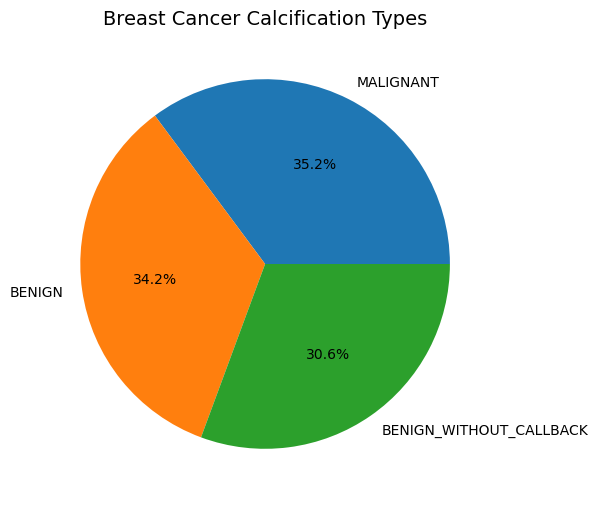

In [42]:
# pathology distributions
value = calc_train['pathology'].value_counts()
plt.figure(figsize=(8,6))

plt.pie(value, labels=value.index, autopct='%1.1f%%')
plt.title('Breast Cancer Calcification Types', fontsize=14)
plt.show()

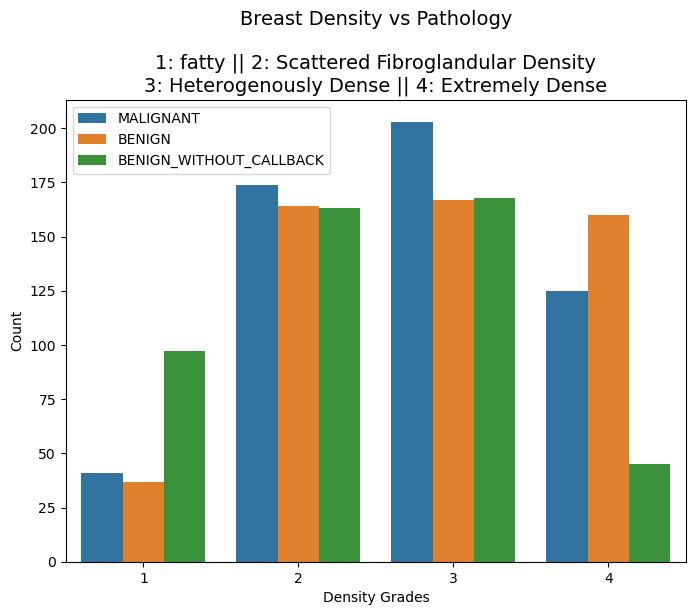

In [43]:
# breast density against pathology
plt.figure(figsize=(8,6))

sns.countplot(calc_train, x='breast_density', hue='pathology')
plt.title('Breast Density vs Pathology\n\n1: fatty || 2: Scattered Fibroglandular Density\n3: Heterogenously Dense || 4: Extremely Dense',
          fontsize=14)
plt.xlabel('Density Grades')
plt.ylabel('Count')
plt.legend()
plt.show()

Full Mammograms:



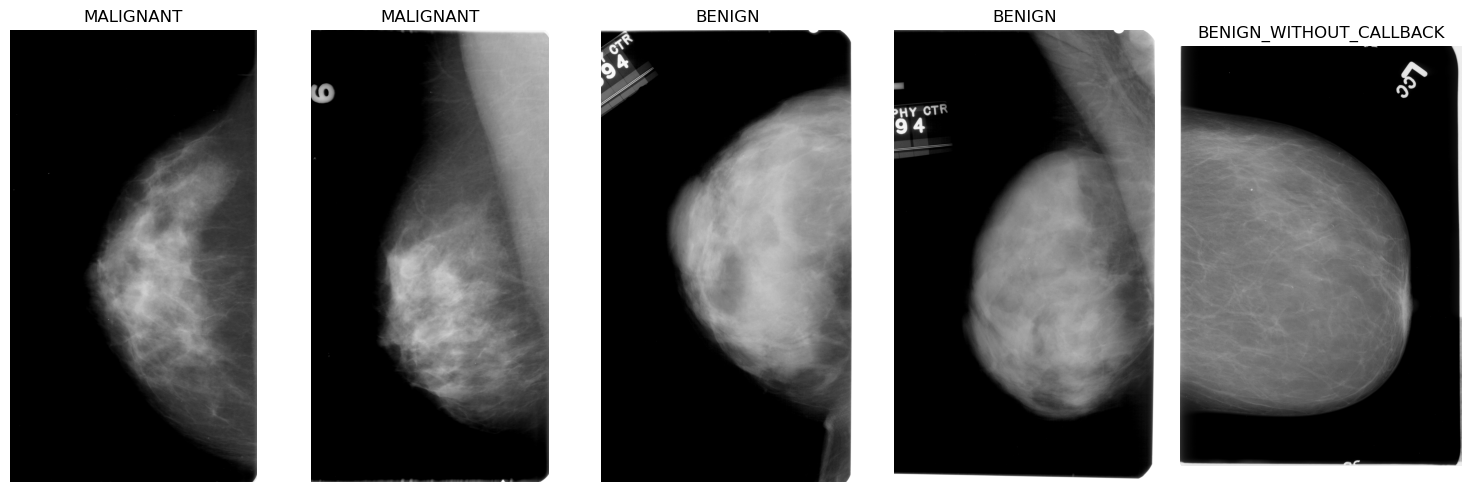

Cropped Mammograms:



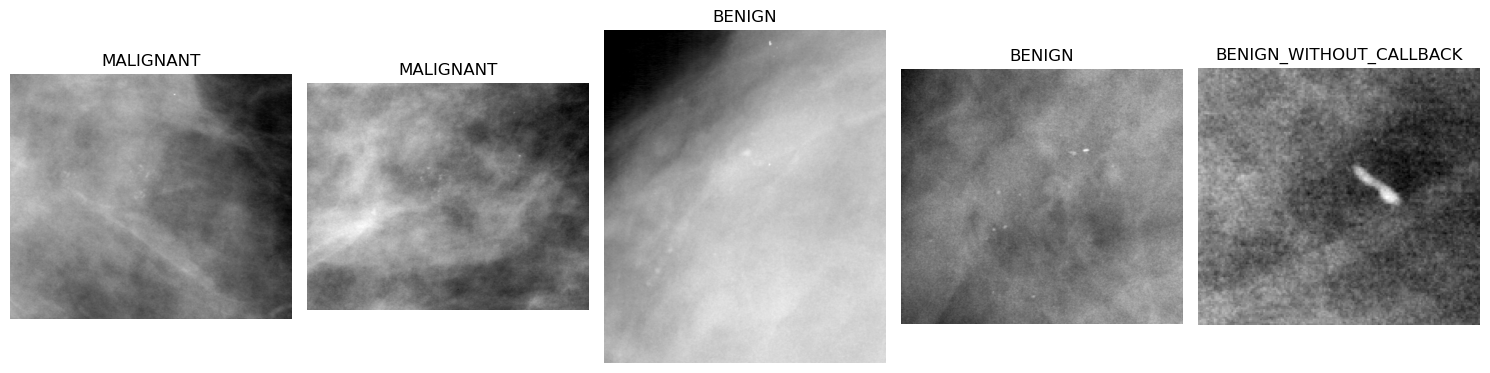

In [44]:
# Display some images
import matplotlib.image as mpimg

# create function to display images
def display_images2(column, number):
    # create figure and axes
    number_to_visualize = number
    rows = 1
    cols = number_to_visualize
    fig, axes = plt.subplots(rows, cols, figsize=(15, 5))
    
    # Loop through rows and display images
    for index, row in calc_train.head(number_to_visualize).iterrows():
        image_path = row[column]
        image = mpimg.imread(image_path)
        ax = axes[index]
        ax.imshow(image, cmap='gray')
        ax.set_title(f"{row['pathology']}")
        ax.axis('off')
    plt.tight_layout()
    plt.show()

print('Full Mammograms:\n')
display_images2('image_file_path', 5)
print('Cropped Mammograms:\n')
display_images2('cropped_image_file_path', 5)

Preprocessing of images

In [45]:
import tensorflow as tf
from tensorflow import keras
import cv2
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

def image_processor(image_path, target_size):
    """Preprocess images for CNN model"""
    absolute_image_path = os.path.abspath(image_path)
    image = cv2.imread(absolute_image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (target_size[1], target_size[0]))
    image_array = image / 255.0
    return image_array

# Merge datasets
full_mass = pd.concat([mass_train, mass_test], axis=0)
full_calc = calc_train

# Define the target size
target_size = (224, 224, 3)

# Apply preprocessor to train data
full_mass['processed_images'] = full_mass['image_file_path'].apply(lambda x: image_processor(x, target_size))
full_calc['processed_images'] = full_calc['image_file_path'].apply(lambda x: image_processor(x, target_size))

# Create a binary mapper
#class_mapper = {'MALIGNANT': 1, 'BENIGN': 0, 'BENIGN_WITHOUT_CALLBACK': 0} 

# Convert the processed_images column to an array
X_resized = np.array(full_mass['processed_images'].tolist())
X_resized2 = np.array(full_calc['processed_images'].tolist())

# Apply class mapper to pathology column
full_mass['labels'] = full_mass['assessment']
full_calc['labels'] = full_calc['assessment']

# Check the number of classes
num_classes = len(full_mass['labels'].unique())
num_classes2 = len(full_calc['labels'].unique()) 

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_resized, full_mass['labels'].values, test_size = 0.2, random_state = 42)

y_train = to_categorical(y_train, 6)
y_test = to_categorical(y_test, 6)


print('X_train shape : {}' .format(X_train.shape))
print('X_test shape : {}' .format(X_test.shape))
print('y_train shape : {}' .format(y_train.shape))
print('y_test shape : {}' .format(y_test.shape))

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_resized2, full_calc['labels'].values, test_size = 0.2, random_state = 42)

y_train2 = to_categorical(y_train2, 6)
y_test2 = to_categorical(y_test2, 6)


print('X_train shape : {}' .format(X_train2.shape))
print('X_test shape : {}' .format(X_test2.shape))
print('y_train shape : {}' .format(y_train2.shape))
print('y_test shape : {}' .format(y_test2.shape))

X_train shape : (1356, 224, 224, 3)
X_test shape : (340, 224, 224, 3)
y_train shape : (1356, 6)
y_test shape : (340, 6)
X_train shape : (1235, 224, 224, 3)
X_test shape : (309, 224, 224, 3)
y_train shape : (1235, 6)
y_test shape : (309, 6)


CNN Architecture

In [47]:
# Import necessary TensorFlow libraries

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, LeakyReLU, Dropout
from keras.optimizers import Adam, SGD, RMSprop, Nadam
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2
from keras.applications import InceptionResNetV2
from keras.utils import plot_model

X_train_combined = np.concatenate((X_train, X_train2), axis=0)
X_test_combined = np.concatenate((X_test, X_test2), axis=0)
y_train_combined = np.concatenate((y_train, y_train2), axis=0)
y_test_combined = np.concatenate((y_test, y_test2), axis=0)

# Augment data
train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    channel_shift_range=20)

# apply augmentation to training data
image_size=224
train_data_augmented = train_datagen.flow(X_train_combined, y_train_combined, batch_size=32)

mode = InceptionResNetV2(input_shape=(image_size, image_size, 3), include_top=False, weights='imagenet')


for layer in mode.layers[:-5]:
    layer.trainable = False

# instantiate CNN model
model = tf.keras.Sequential([mode,
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(6, activation='softmax')
])



# compile model
model.compile(loss='categorical_crossentropy', 
              optimizer=Adam(learning_rate=0.0001), 
              metrics=['accuracy'])

# train model
history = model.fit(X_train_combined, y_train_combined, validation_data = (X_test_combined, y_test_combined), epochs = 3 , batch_size = 75)

Epoch 1/3
35/35 [==============================] - 513s 14s/step - loss: 4.0832 - accuracy: 0.4141 - val_loss: 3.7210 - val_accuracy: 0.4900
Epoch 2/3
35/35 [==============================] - 498s 14s/step - loss: 3.5128 - accuracy: 0.5453 - val_loss: 3.4721 - val_accuracy: 0.5039
Epoch 3/3
35/35 [==============================] - 503s 14s/step - loss: 3.1807 - accuracy: 0.5855 - val_loss: 3.2791 - val_accuracy: 0.5362


#############################################################################################################################

In [48]:
model.evaluate(X_test_combined, y_test_combined)

21/21 [==============================] - 90s 4s/step - loss: 3.2791 - accuracy: 0.5362


[3.279109477996826, 0.5362095236778259]

21/21 [==============================] - 97s 4s/step


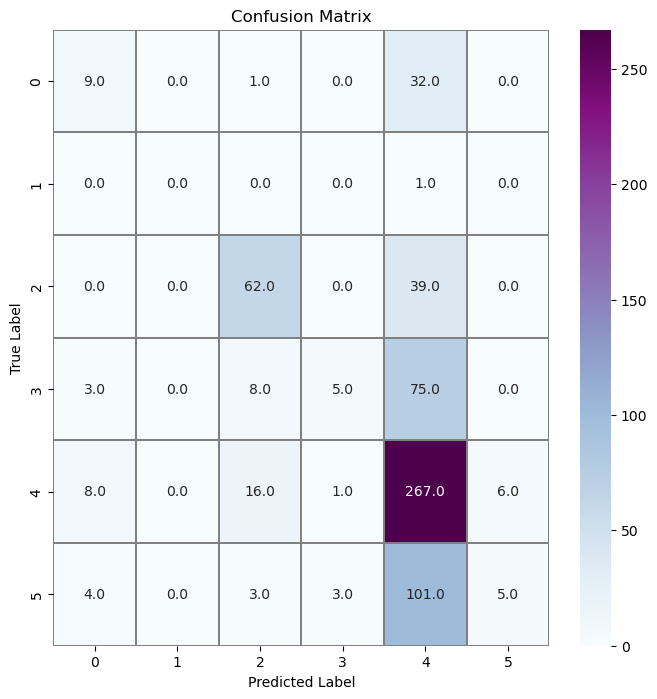

In [49]:
from sklearn.metrics import confusion_matrix

Y_pred = model.predict(X_test_combined)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(y_test_combined,axis = 1) 

confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="BuPu",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

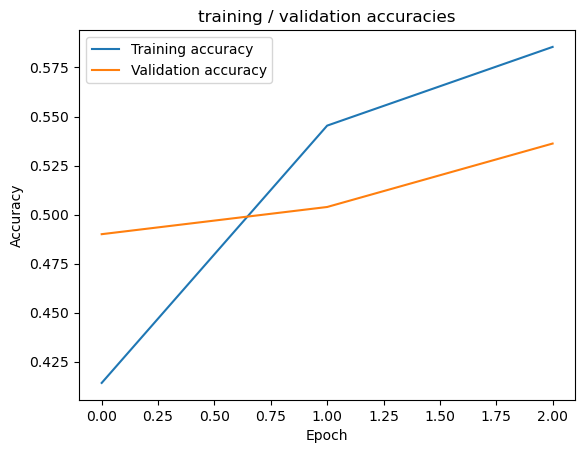

In [50]:
import matplotlib.pyplot as plt

# Visualize model history
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('training / validation accuracies')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

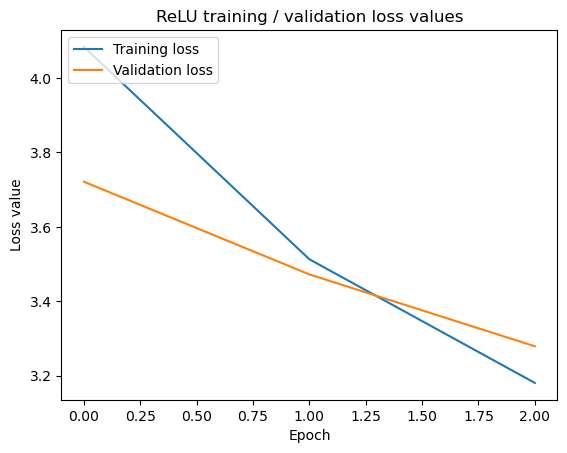

In [51]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('ReLU training / validation loss values')
plt.ylabel('Loss value')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

1/1 [==============================] - 0s 186ms/step
Predicted Diagnosis:  C3 : Anomalie probablement bénigne
True Diagnosis:  C3 : Anomalie probablement bénigne


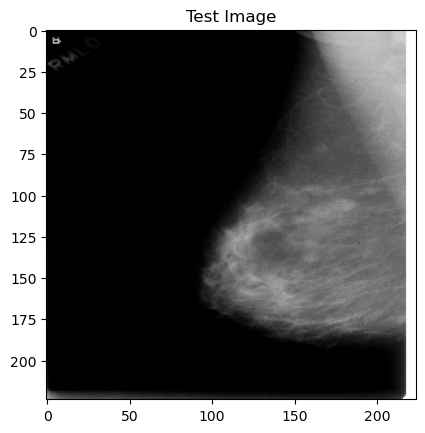

In [52]:
# Define a mapping of class indices to human-readable labels
pathologies = {
    0: ' C0 : Investigation incomplète',
    1: ' C1 : Normal',
    2: ' C2 : Anomalie bénigne',
    3: ' C3 : Anomalie probablement bénigne',
    4: ' C4 : Anomalie demandant une biopsie',
    5: ' C5 : Anomalie fortement suspecte d un cancer',
    6: ' C6 : Cancer prouvé à la biopsie'
}

# Define a function for plotting an image from an array
def img_plot(arr, index=0):
    # Set the title for the plot
    plt.title('Test Image')
    
    # Display the image at the specified index in the array
    plt.imshow(arr[index])

# Set the index value to 90
index = 110

# Plot an image from the X_test array using the img_plot function
img_plot(X_test_combined, index)

# Extract a single image from X_test based on the specified index
input = X_test_combined[index:index+1]

# Make a prediction using the CNN model and get the class with the highest probability
predicted_class_index = model.predict(input)[0].argmax()

# Get the true label from the y_test array
true_class_index = y_test_combined[index].argmax()

# Get the predicted and true labels
predicted_label = pathologies[predicted_class_index]
true_label = pathologies[true_class_index]

# Get the calcification type based on the predicted class index (modify as needed)
pathology = pathologies[predicted_class_index]

# Print the prediction result with calcification type
print('Predicted Diagnosis:', predicted_label)
#print('Pathology :', pathology)
print('True Diagnosis:', true_label)

1/1 [==============================] - 0s 178ms/step
Predicted Diagnosis:  Catégorie 4 Anomalie demandant une biopsie
True Diagnosis:  Catégorie 5 Anomalie fortement suspecte d un cancer


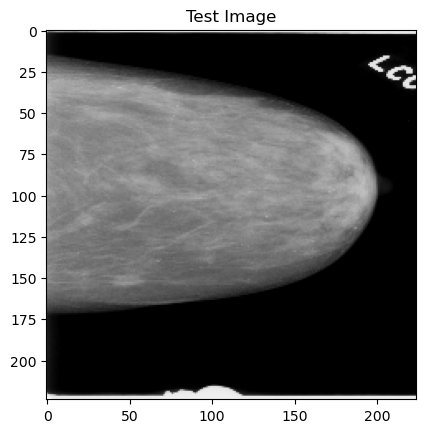

In [53]:
# Define a mapping of class indices to human-readable labels
pathologies = {
    0: ' Catégorie 0 Investigation incomplète',
    1: ' Catégorie 1 Normal',
    2: ' Catégorie 2 Anomalie bénigne',
    3: ' Catégorie 3 Anomalie probablement bénigne',
    4: ' Catégorie 4 Anomalie demandant une biopsie',
    5: ' Catégorie 5 Anomalie fortement suspecte d un cancer',
    6: ' Catégorie 6 Cancer prouvé à la biopsie'
}

# Define a function for plotting an image from an array
def img_plot(arr, index=0):
    # Set the title for the plot
    plt.title('Test Image')
    
    # Display the image at the specified index in the array
    plt.imshow(arr[index])

# Set the index value to 90
index = 302

# Plot an image from the X_test array using the img_plot function
img_plot(X_test_combined, index)

# Extract a single image from X_test based on the specified index
input = X_test_combined[index:index+1]

# Make a prediction using the CNN model and get the class with the highest probability
predicted_class_index = model.predict(input)[0].argmax()

# Get the true label from the y_test array
true_class_index = y_test_combined[index].argmax()

# Get the predicted and true labels
predicted_label = pathologies[predicted_class_index]
true_label = pathologies[true_class_index]

# Get the calcification type based on the predicted class index (modify as needed)
#pathology = pathologies[predicted_class_index]

# Print the prediction result with calcification type
print('Predicted Diagnosis:', predicted_label)
print('True Diagnosis:', true_label)

In [54]:
from tensorflow.keras.models import load_model

In [55]:
model.save_weights('_model2_.h5')

# Save the Model to JSON
model_json = model.to_json()
with open('_model2_.json', 'w') as json_file:
    json_file.write(model_json)
    
print('Model saved to the disk.')

Model saved to the disk.
